### Baywheels - Communicate Data Findings Project

Data Columns

Each trip is anonymized and includes:

Trip Duration (seconds)

Start Time and Date

End Time and Date

Start Station ID

Start Station Name

Start Station Latitude

Start Station Longitude

End Station ID

End Station Name

End Station Latitude

End Station Longitude

Bike ID

User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)


importing libraries and reading filesinto the data frame

In [1]:
#importing libraries
import pandas as pd
import os
import numpy as np
import zipfile
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
#change to required directory
os.chdir('C:\\Users\\Ahmed Hassan\\Courses\\Udacity\\Advanced Data Analysis\\DataFindingsProject\\Baywheels\\Baywheel Zips\\2019')

In [8]:
#I've created a folder that includes all 2019 monthly zipfile which will be used to conduct exploration
os.listdir()

['201901-fordgobike-tripdata.csv.zip',
 '201902-fordgobike-tripdata.csv.zip',
 '201903-fordgobike-tripdata.csv.zip',
 '201904-fordgobike-tripdata.csv.zip',
 '201905-baywheels-tripdata.csv.zip',
 '201906-baywheels-tripdata.csv.zip',
 '201907-baywheels-tripdata.csv.zip',
 '201908-baywheels-tripdata.csv.zip',
 '201909-baywheels-tripdata.csv.zip',
 '201910-baywheels-tripdata.csv.zip',
 '201911-baywheels-tripdata.csv.zip',
 '201912-baywheels-tripdata.csv.zip']

In [9]:
#using glob to iterate over zipfiles only
glob.glob('*.zip')

['201901-fordgobike-tripdata.csv.zip',
 '201902-fordgobike-tripdata.csv.zip',
 '201903-fordgobike-tripdata.csv.zip',
 '201904-fordgobike-tripdata.csv.zip',
 '201905-baywheels-tripdata.csv.zip',
 '201906-baywheels-tripdata.csv.zip',
 '201907-baywheels-tripdata.csv.zip',
 '201908-baywheels-tripdata.csv.zip',
 '201909-baywheels-tripdata.csv.zip',
 '201910-baywheels-tripdata.csv.zip',
 '201911-baywheels-tripdata.csv.zip',
 '201912-baywheels-tripdata.csv.zip']

extracting and reading csv files in Year 2019

In [3]:
for i in glob.glob('*.zip'): #returns a list of files with only zip extension
    with zipfile.ZipFile(i, 'r') as myzip: #extracting zips with context manager to avoid RAM usage
        myzip.extractall() #extracting zipfiles
dfs = [] 


for i in glob.glob('*.csv'): # returns a list of only csv files to creating our dataframe
    df = pd.read_csv(i, delimiter = ',',
                     parse_dates =['start_time', 'end_time'],  #parsing start and end times into date format
                    low_memory = False) # setting this to avoid warnings
    dfs.append(df)
    
original_df = pd.concat(dfs, axis = 0, ignore_index = True, sort = False) # creating the dataframe

reference:
    
    helped me reading the files but I took a different approach
    
    https://github.com/QuantificAid/communicate_data_findings/blob/master/exploration_template.ipynb

In [4]:
df = original_df.copy(deep=True)
#copying data in case we need the original df

In [5]:
df.shape

(2506983, 15)

In [6]:
df.columns #no work needed to be done on df column names

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip', 'rental_access_method'],
      dtype='object')

### Data Exploration and cleaning

In [7]:
df.info(null_counts = True) 
# setting (null_counts=True) because it won't in large dataframes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2506983 non-null  int64         
 1   start_time               2506983 non-null  datetime64[ns]
 2   end_time                 2506983 non-null  datetime64[ns]
 3   start_station_id         2426249 non-null  float64       
 4   start_station_name       2426850 non-null  object        
 5   start_station_latitude   2506983 non-null  float64       
 6   start_station_longitude  2506983 non-null  float64       
 7   end_station_id           2424081 non-null  float64       
 8   end_station_name         2424633 non-null  object        
 9   end_station_latitude     2506983 non-null  float64       
 10  end_station_longitude    2506983 non-null  float64       
 11  bike_id                  2506983 non-null  int64         
 12  

In [8]:
np.sum(df.isna())

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [9]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip', 'rental_access_method'],
      dtype='object')

In [10]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


Data Shape

In [177]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_min,start_day,duration_hrs
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN,1347,Thursday,17
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN,1098,Thursday,20
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN,1043,Thursday,18
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN,744,Thursday,19
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN,1011,Thursday,14


In [11]:
output = []

for col in df.columns:

    nonNull  = len(df) - np.sum(pd.isna(df[col]))
    nullVals = np.sum(pd.isna(df[col]))
    unique = df[col].nunique()
    top_freq = df[col].value_counts().index[0]
    colType = str(df[col].dtype)
    
    
    output.append([col, nonNull,nullVals, unique, top_freq, colType])

output = pd.DataFrame(output)   
output.columns = ['colName','non-null values', 'nullVals', 'unique', 'top_freq', 'dtype']

In [12]:
output

,colName,non-null values,nullVals,unique,top_freq,dtype
0,duration_sec,2506983,0,15280,339,int64
1,start_time,2506983,0,2502104,2019-07-30 07:59:17,datetime64[ns]
2,end_time,2506983,0,2502105,2019-07-22 08:35:41,datetime64[ns]
3,start_station_id,2426249,80734,436,58,float64
4,start_station_name,2426850,80133,446,Market St at 10th St,object
5,start_station_latitude,2506983,0,74719,37.7766,float64
6,start_station_longitude,2506983,0,75943,-122.417,float64
7,end_station_id,2424081,82902,436,67,float64
8,end_station_name,2424633,82350,446,San Francisco Caltrain Station 2 (Townsend St...,object
9,end_station_latitude,2506983,0,76905,37.7766,float64


In [179]:
df.describe(include = 'all')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_min,start_day,duration_hrs
count,2.506982e+06,2506982,2506982,2.426249e+06,2426850,2.506982e+06,2.506982e+06,2.424081e+06,2424633,2.506982e+06,2.506982e+06,2.506982e+06,2506982,2263724,120837,2.506982e+06,2506982,2.506982e+06
unique,NaN,2502103,2502104,NaN,446,NaN,NaN,NaN,446,NaN,NaN,NaN,2,2,2,NaN,7,NaN
top,NaN,2019-07-30 07:59:17,2019-07-27 18:08:44,NaN,Market St at 10th St,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,No,app,NaN,Tuesday,NaN
freq,NaN,5,4,NaN,45058,NaN,NaN,NaN,52146,NaN,NaN,NaN,2021166,2086152,108009,NaN,427640,NaN
first,NaN,2019-01-01 00:07:10.576000,2019-01-01 00:10:57.196000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-31 23:59:41,2020-01-01 10:37:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8.072848e+02,NaN,NaN,1.465047e+02,NaN,3.776506e+01,-1.223499e+02,1.427044e+02,NaN,3.776422e+01,-1.223459e+02,2.789809e+04,NaN,NaN,NaN,1.296340e+01,NaN,1.352903e+01
std,1.888977e+03,NaN,NaN,1.223171e+02,NaN,1.363696e-01,3.089648e-01,1.214296e+02,NaN,2.392884e-01,7.080418e-01,1.146061e+05,NaN,NaN,NaN,3.148428e+01,NaN,4.804543e+00
min,6.000000e+01,NaN,NaN,3.000000e+00,NaN,0.000000e+00,-1.225143e+02,3.000000e+00,NaN,0.000000e+00,-1.225143e+02,4.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN,0.000000e+00
25%,3.590000e+02,NaN,NaN,4.700000e+01,NaN,3.776931e+01,-1.224130e+02,4.300000e+01,NaN,3.777003e+01,-1.224117e+02,1.952000e+03,NaN,NaN,NaN,5.000000e+00,NaN,9.000000e+00


In [14]:
df.groupby('user_type')['duration_sec'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
Customer,485817.0,1354.646951,3680.848840,60.0,498.0,797.0,1289.0,912110.0
Subscriber,2021166.0,676.169159,1221.056587,60.0,338.0,531.0,810.0,86114.0


In [15]:
value = df.groupby('user_type')['duration_sec'].describe().max()[-1]
value

912110.0

a maximum value of 912110 in customer biasing the whole data set

In [16]:
o_index = df[df.duration_sec == value].index.values[0]
o_index

2481276

In [17]:
df.drop(index = o_index, inplace=True)

### Questions To Explore

When are most trips taken in terms of time of day, day of the week, or month of the year?


How long does the average trip take?


Does the above depend on if a user is a subscriber or customer?

In order to answer these questions we need to add a new columns

In [18]:
df['duration_min'] = df['duration_sec']//60

In [19]:
df['start_day'] =  df['start_time'].dt.day_name() #extracting day name from the timestamp

In [20]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,duration_min,start_day
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN,1347,Thursday
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN,1098,Thursday
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN,1043,Thursday
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN,744,Thursday
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN,1011,Thursday


### Exploratory Visualization and Univariate Exploration

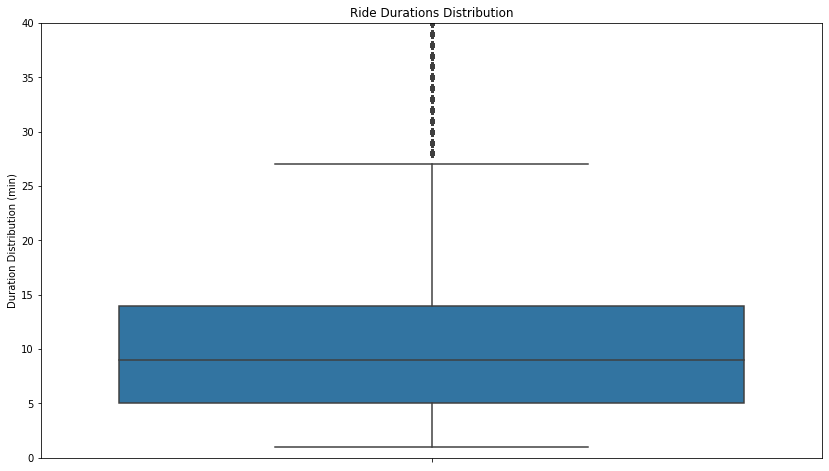

In [136]:
plt.figure(figsize=[14,8])
sns.boxplot(data=df, y= 'duration_min')
plt.ylim(0, 40)
plt.ylabel('Duration Distribution (min)')
plt.title("Ride Durations Distribution")
plt.xlabel('');

most Trips are between 5 minutes and 15 minutes with a median of approximately 10 mins with most of the observations between 0 and 30 and there are a large number of outliers

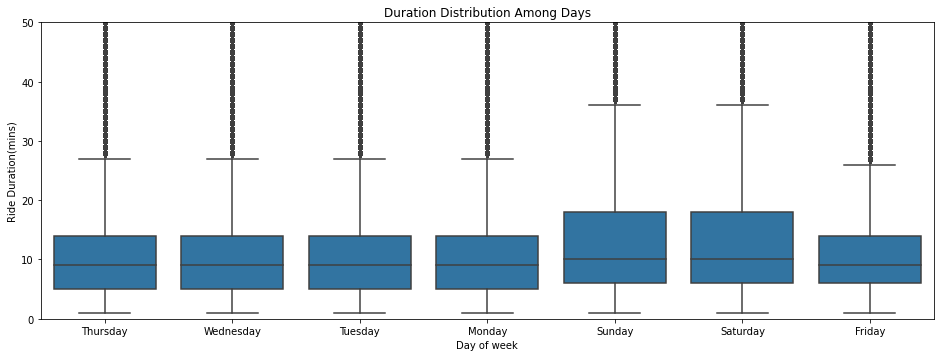

In [139]:
plt.figure(figsize=[16,12])
plt.subplot(2,1,1)

sns.boxplot(x = 'start_day', y = 'duration_min', data = df, color = sns.color_palette()[0])
plt.title('Duration Distribution Among Days')
plt.ylabel('Ride Duration(mins)')
plt.xlabel('Day of week')
plt.ylim(0,50);


    All Weekdays are the same in terms of duration distribution between 1, 28 minutes
    A peak is observed in duration during weekends with a high of 37 minutes

In [25]:
df.groupby('user_type')['duration_min'].mean()

user_type
Customer      22.055190
Subscriber    10.778064
Name: duration_min, dtype: float64

In [26]:
df.groupby('bike_id')['duration_min'].mean()

bike_id
4          3.500000
11        14.289100
12        12.207018
13        12.931783
14        11.638629
            ...    
998086    24.080000
998430    20.611111
999422     1.742857
999937     1.500000
999941     2.200000
Name: duration_min, Length: 11070, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506982 entries, 0 to 2506982
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
 15  duration_min             int64         
 16  start_day                object        
dtypes: datetime64[ns](2), float

Number of observations per user_type

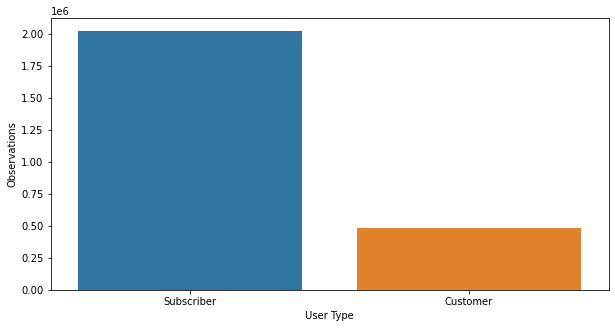

In [28]:
plt.figure(figsize=[10,5])
sns.countplot(data = df, x = df.user_type);
plt.ylabel('Observations');
plt.xlabel('User Type');

Percentages of user type

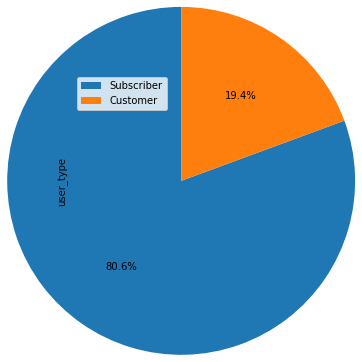

In [155]:
df.user_type.value_counts().plot(kind = 'pie', startangle = 90,
                                 autopct = '%1.1f%%', radius = 2, 
                                labels = None )

plt.legend(loc = 'best', labels = df.user_type.value_counts().index);

In [30]:
df.duration_min.describe()

count    2.506982e+06
mean     1.296340e+01
std      3.148428e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.437000e+03
Name: duration_min, dtype: float64

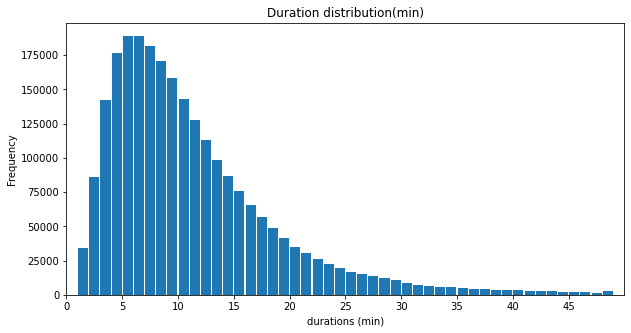

In [123]:
plt.figure(figsize=[10,5])
bins = np.arange(0,50,1)

tick_val = np.arange(0,50,5)
tick_names = np.arange(0,50,5)

plt.hist( df.duration_min, bins = bins, rwidth = 0.9)
plt.xlim(0,50);
plt.xlabel('durations (min)')
plt.ylabel('Frequency')
plt.xticks(tick_val, tick_names)
plt.title('Duration distribution(min)');

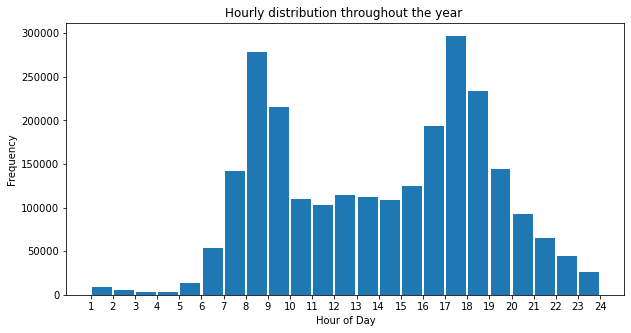

In [32]:
plt.figure(figsize = [10,5])
bins =np.arange(1,25,1)
plt.hist(df.start_time.dt.hour, rwidth = 0.9, bins = bins)
plt.xticks(bins,bins);
plt.title('Hourly distribution throughout the year ')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency');

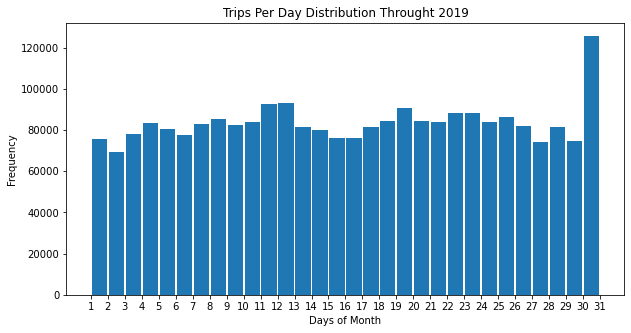

In [133]:
plt.figure(figsize = [10,5])
bins =np.arange(1,31+1,1)
plt.hist(df.start_time.dt.day, rwidth = 0.9, bins = bins)
plt.xticks(bins,bins);
plt.title('Trips Per Day Distribution Throught 2019')
plt.xlabel('Days of Month')
plt.ylabel('Frequency');

There is a uniform trend throughout the month which will be further investigated below

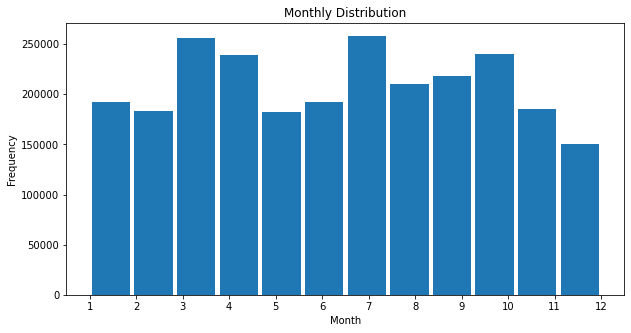

In [34]:
plt.figure(figsize = [10,5])
plt.hist(df.start_time.dt.month, bins = 12, rwidth = 0.9);
plt.xticks(np.arange(1,13,1));
plt.title('Monthly Distribution')
plt.xlabel('Month')
plt.ylabel('Frequency');

A high peaks in March and Feb, declines in May and June then the highest peak in Sep 

In [35]:
days_frequency = df.start_day.value_counts()
day_order_freq = days_frequency.index
max_day = days_frequency[0]
max_props = max_day/df.shape[0]

tick_vals = np.arange(0, max_props +0.01, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_vals]

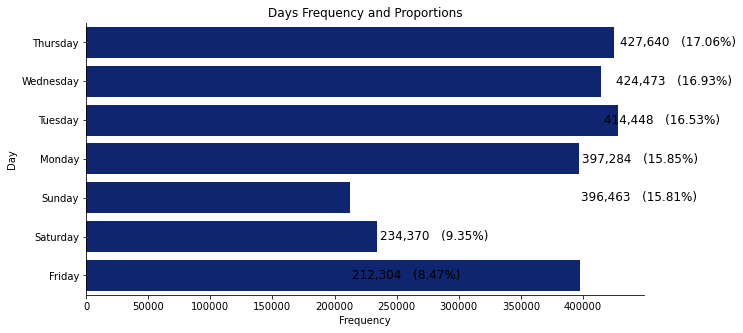

In [36]:
base_color = sns.color_palette('dark')[0]

f, ax = plt.subplots(figsize = (10,5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


sns.countplot(data = df, y = df.start_day ,# order = day_order_freq,
              color = base_color)


for idx, value in enumerate(days_frequency):
    count = value
    pct_string = '{:,}   ({:0.2f}%)'.format(value, 100*count/df.shape[0], value)
    plt.text(count+2000, idx, pct_string, va = 'center',fontsize = 12)
plt.xlabel('Frequency')
plt.ylabel('Day');
plt.title('Days Frequency and Proportions');

### Question1 : When are most tripes taken in terms of time of day, day of the week, or month of the year

There is a peak in average duration from June to September and declines but the least is February then January

The highest peak in days is day 31 with a maximum of tuesday and weekdays and declines on weekend

Tuesday is the most frequent of 427,640 and 17.06% followed by Thursday, Wednesday Friday and Monday with slight difference. Saturday and Sunday is the least frequent days since they are weekends and people tend to rest

It appears that weekdays are almost twice as weekends 

### BiVariate Exploration

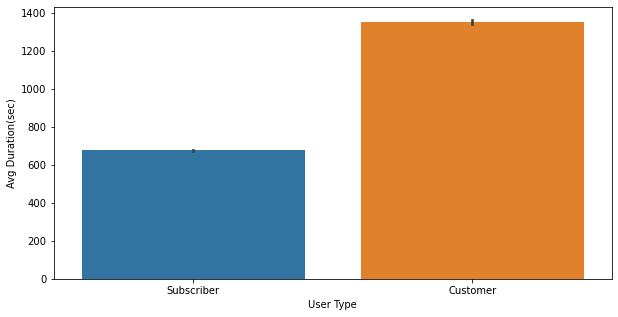

In [158]:
plt.figure(figsize=[10,5])
sns.barplot(data = df, x = 'user_type', y = 'duration_sec');
plt.xlabel('User Type')
plt.ylabel('Avg Duration(sec)');

With a number of observations and total number of duration is for subscribers but the mean of customers is higher than twice the subscribers mean which leads to further investigation

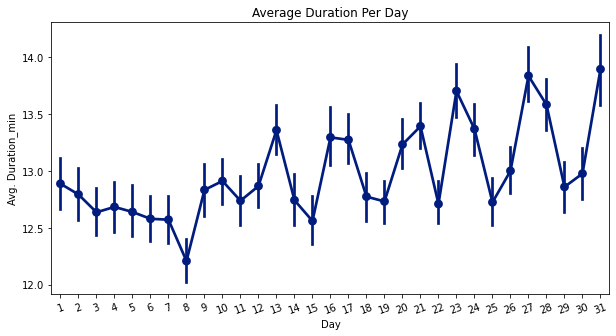

In [159]:
plt.figure(figsize =[10,5])
sns.pointplot(data = df, x = df.start_time.dt.day, y = 'duration_min',
            color = base_color);
plt.xticks(rotation = 20);
plt.xlabel('Day')
plt.ylabel('Avg. Duration_min');
plt.title('Average Duration Per Day');

highest Values at the end of the month with a decline till day 10 start to increase and decrease gradually following up and down trend but with higher values

Text(0.5, 1.0, 'Avg_duration Per Month')

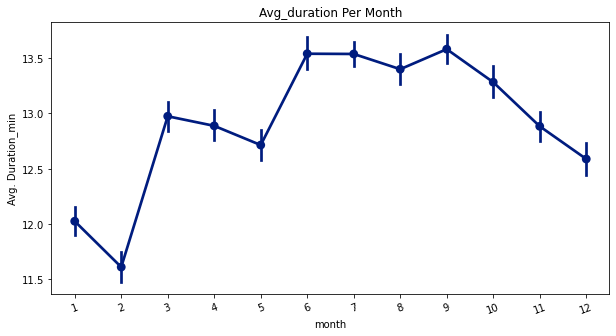

In [160]:
plt.figure(figsize =[10,5])
sns.pointplot(data = df, x = df.start_time.dt.month, y = 'duration_min',
            color = base_color);
plt.xticks(rotation = 20);
plt.xlabel('month')
plt.ylabel('Avg. Duration_min');
plt.title('Avg_duration Per Month')

Weather drastically affects bike activity since the peaks presented in the graph from March to October then reduces drastically in January and February

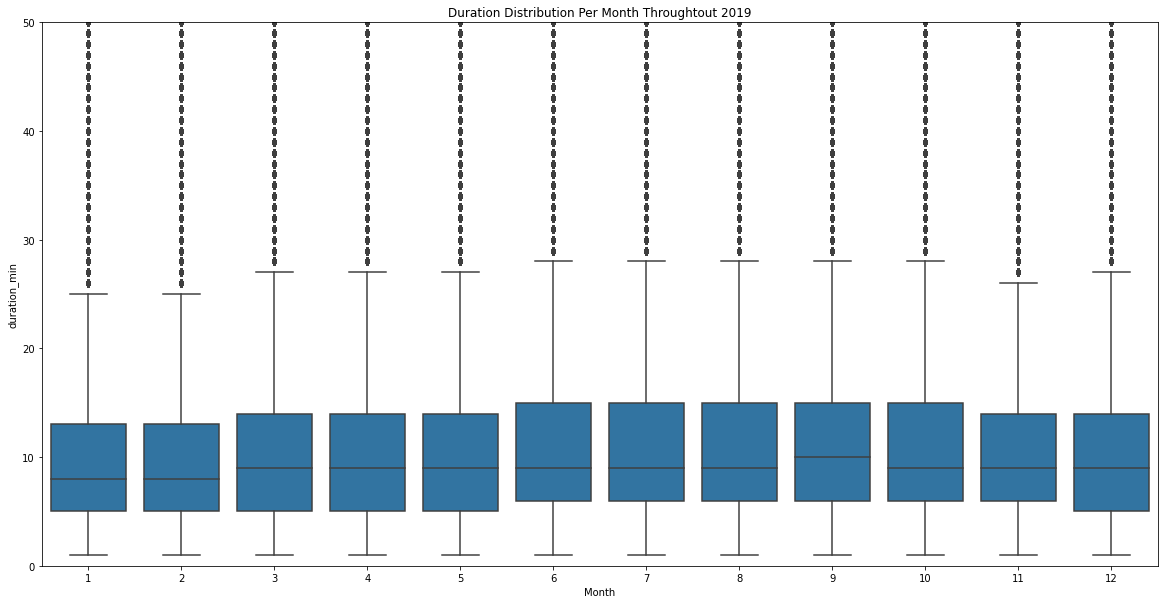

In [162]:
plt.figure(figsize=[20,10])
ax = sns.boxplot(x=df.start_time.dt.month, y='duration_min', data = df, color = sns.color_palette()[0])
plt.ylim(0,50);
plt.xlabel("Month")
plt.title('Duration Distribution Per Month Throughtout 2019');

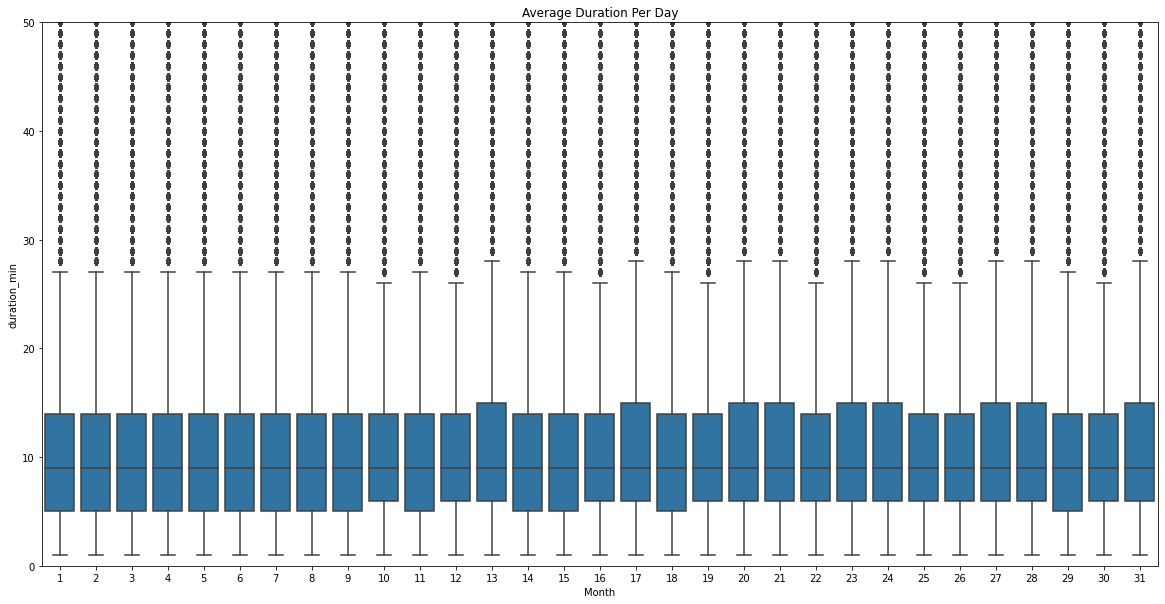

In [164]:
plt.figure(figsize = [20,10])
ax = sns.boxplot(x=df.start_time.dt.day, y = 'duration_min', data = df, color = sns.color_palette()[0])
plt.ylim(0,50)
plt.xlabel("Month")
plt.ylabel('duration_min')
plt.title('Average Duration Per Day');

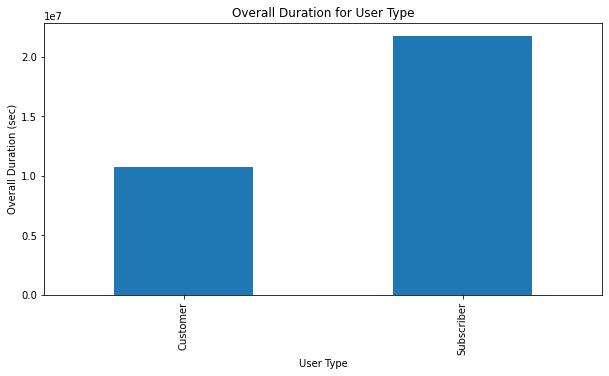

In [165]:
plt.figure(figsize=  [10,5])
df.groupby('user_type')['duration_min'].sum().plot(kind='bar');
plt.xlabel('User Type')
plt.ylabel('Overall Duration (sec)')
plt.title('Overall Duration for User Type');

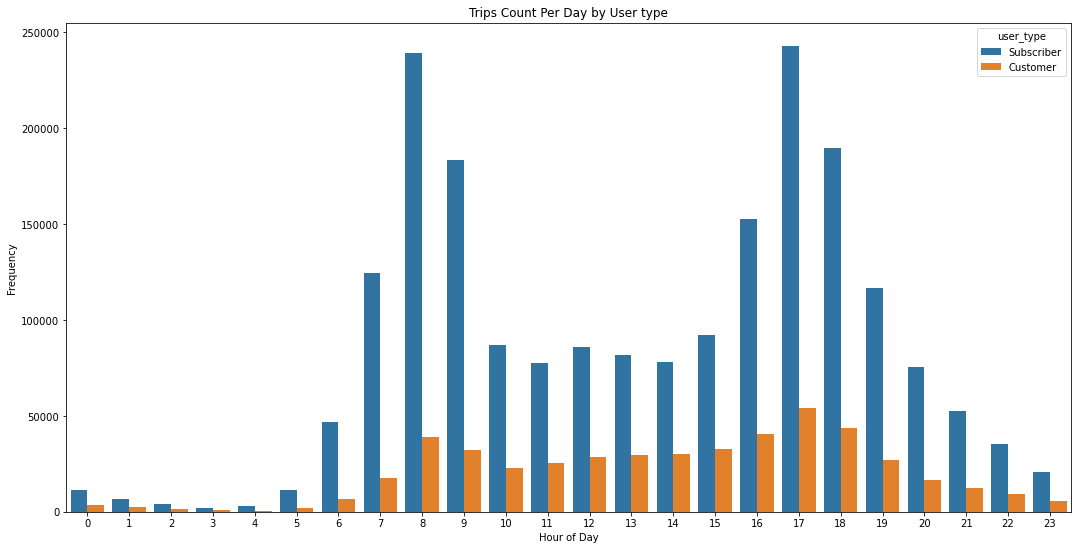

In [168]:
plt.figure(figsize=[18,9])
sns.countplot(data =df, x = df.start_time.dt.hour, hue = 'user_type');
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Trips Count Per Day by User type');

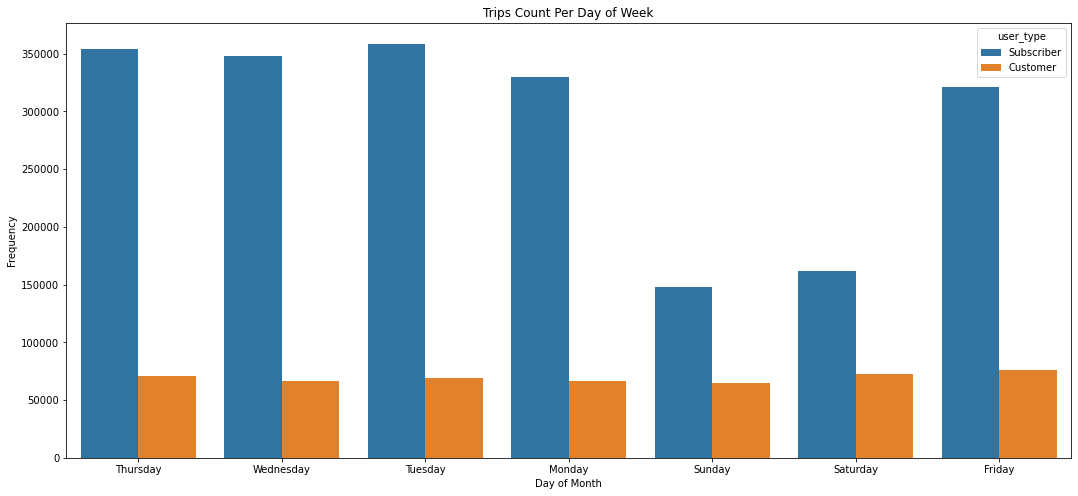

In [169]:
plt.figure(figsize = [18,8])
sns.countplot(data = df, x = 'start_day', hue = 'user_type')
plt.xlabel("Day of Month")
plt.ylabel('Frequency')
plt.title('Trips Count Per Day of Week');

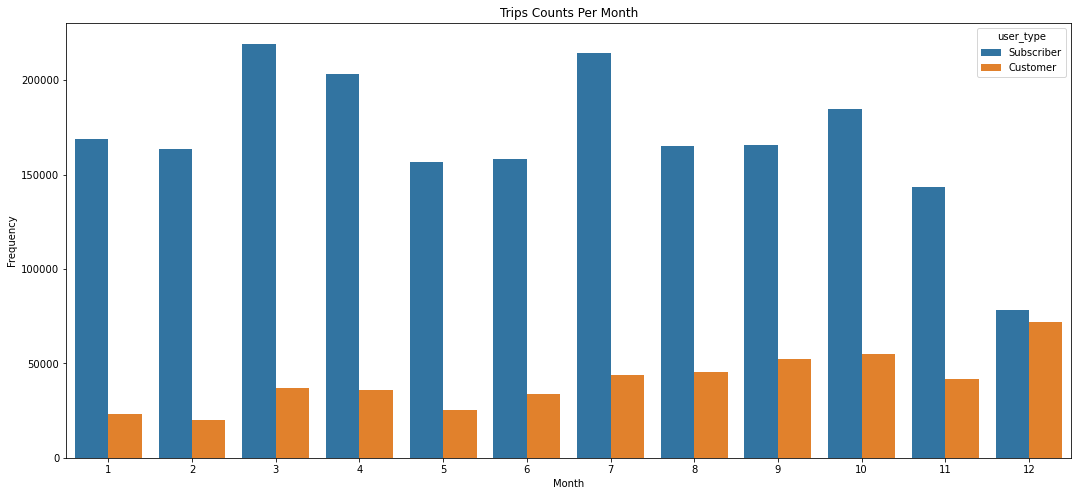

In [171]:
plt.figure(figsize=[18,8])
sns.countplot(data = df, x = df.start_time.dt.month, hue = 'user_type');
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Trips Counts Per Month');

Trends exists from both subscribers and customers with the difference in values with peaks from 7 to 10 am and 4 to 7 pm

In [174]:
idx = np.sum(df.start_station_name.value_counts()>12000)
stations_order = df.start_station_name.value_counts()[:idx]
mostFreq_stations = stations_order[:idx].index

In [175]:
df_sub = df[df['start_station_name'].isin(mostFreq_stations)]

In [176]:
group_dfSub = df_sub.groupby('start_station_name')['duration_min'].mean().sort_values(ascending = False)
mean_order = group_dfSub.index 

Areas with the highest durations

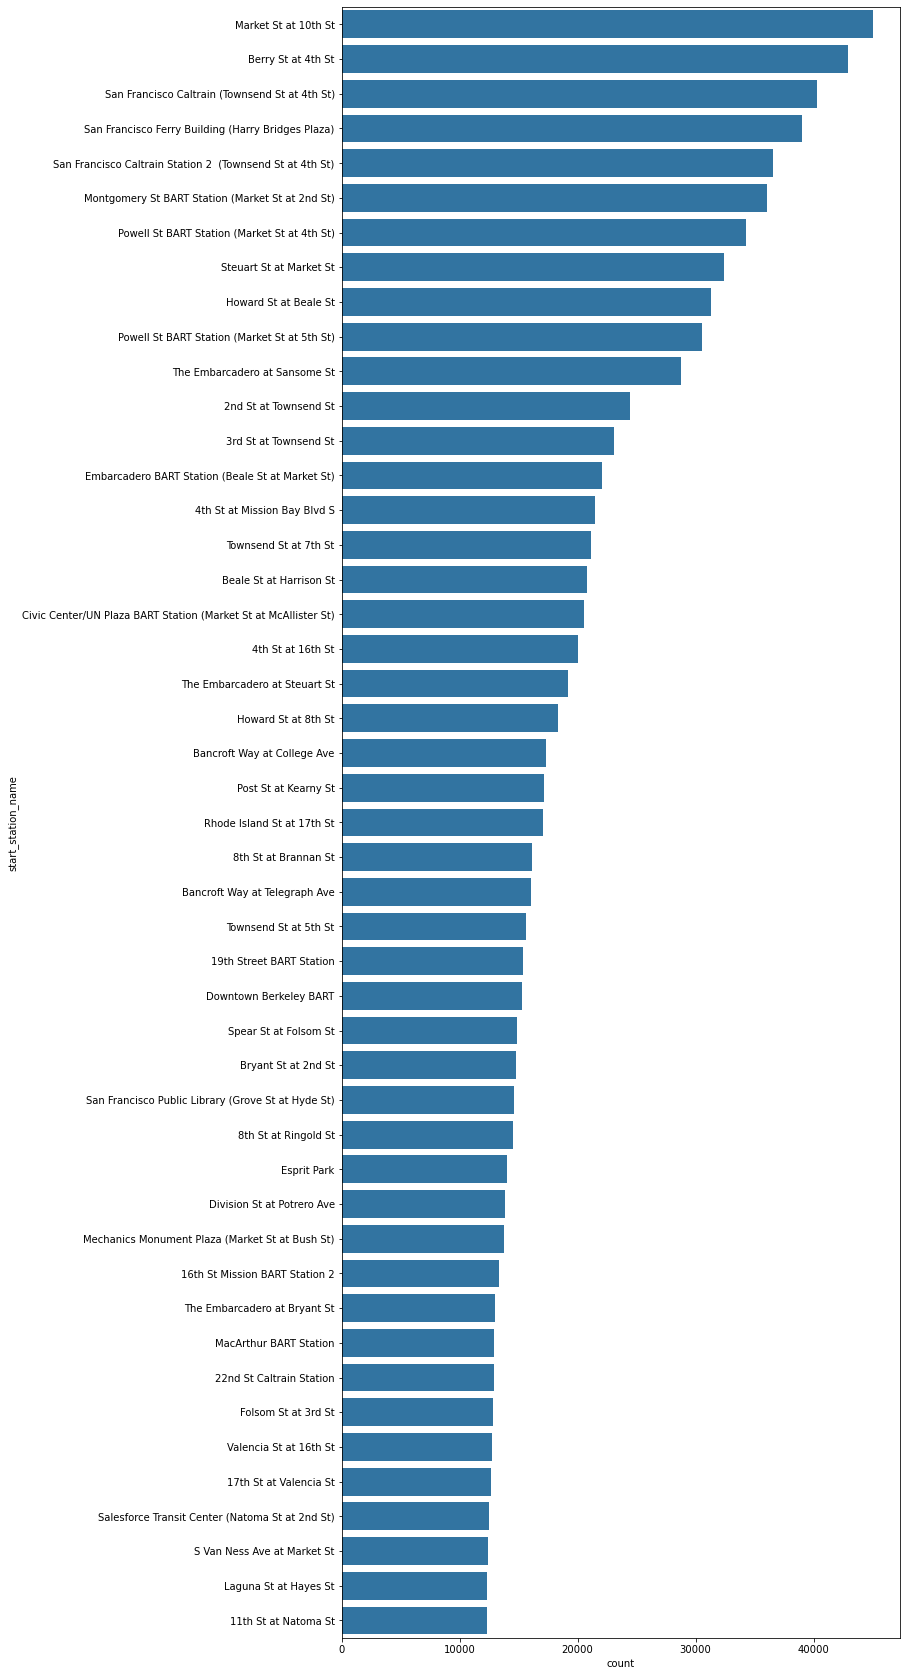

In [54]:
plt.figure(figsize = [10,30])
sns.countplot(data =df_sub, y = 'start_station_name', order = mostFreq_stations, color = sns.color_palette()[0]);

Areas with the highest mean duration

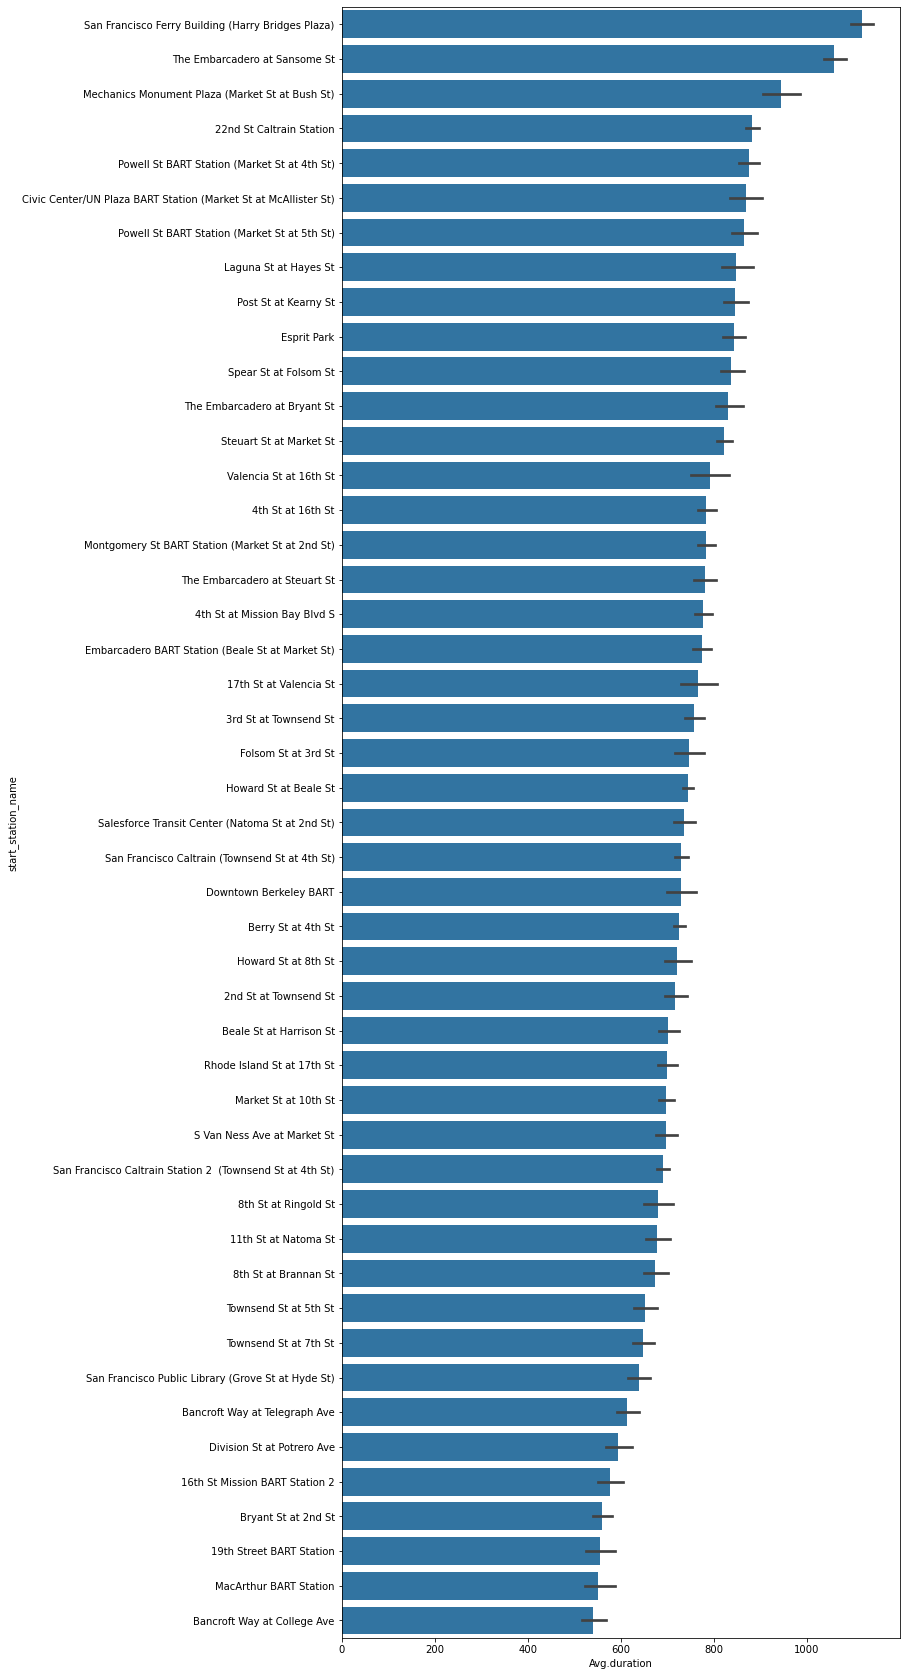

In [55]:
plt.figure(figsize = [10,30])
sns.barplot(data =df_sub, y = 'start_station_name',x = 'duration_sec',
            order = mean_order, color = sns.color_palette()[0]);
plt.xlabel('Avg.duration');

### MultiVariate Exploration

Average Duration of Subscribers is less than Customers Average about 10 and 23 minutes respectively

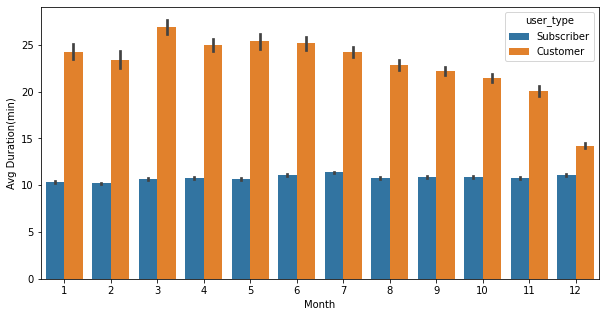

In [56]:
plt.figure(figsize=[10,5])
sns.barplot(data = df, x = df.start_time.dt.month,y = 'duration_min', hue = 'user_type');
plt.xlabel('Month')
plt.ylabel('Avg Duration(min)');

In [57]:
df['duration_hrs'] = df.start_time.dt.hour

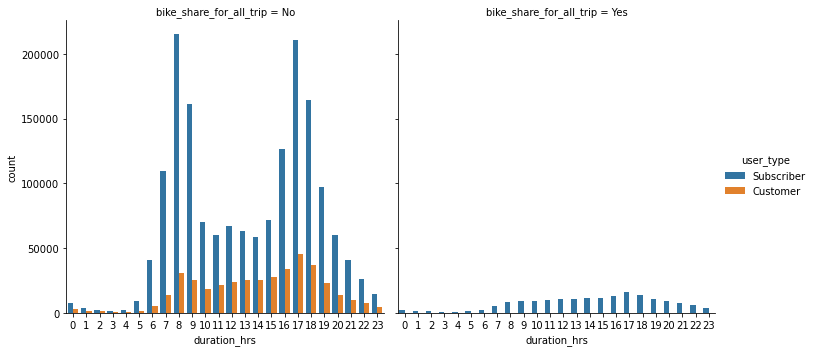

In [58]:
g = sns.catplot(x ='duration_hrs' ,col = 'bike_share_for_all_trip',
                hue = 'user_type', data = df, kind = 'count')

Peak Times betwwen 7 to 9 am and 4 to 6 pm for both customers and subscribers and seems like only subscribers and a few number of them are sharing bike for all trips

During later hours of the day, higher rent duration occurs with both Subscribers and Customers

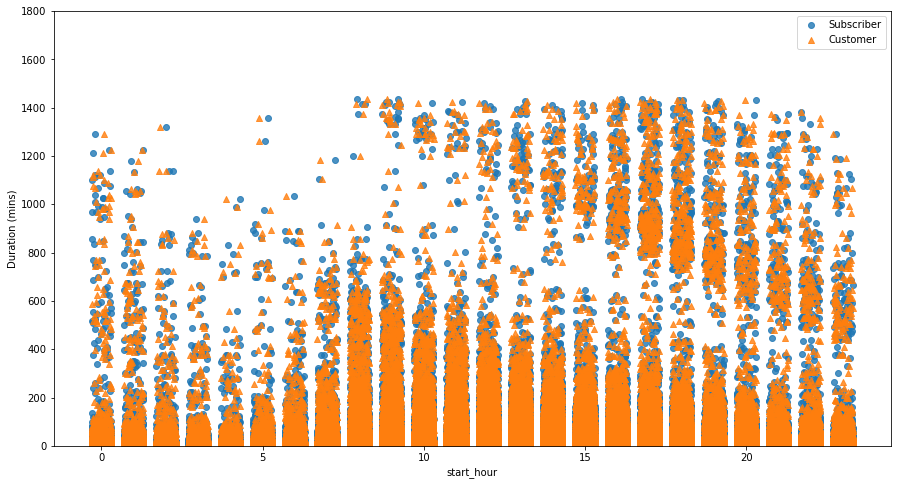

In [59]:
utype_markers = [['Subscriber','o'],
                ['Customer','^']]
plt.figure(figsize = [15,8])
for utype, marker in utype_markers:
    sns.regplot(data = df, x = df.start_time.dt.hour, y = 'duration_min',
                x_jitter = 0.3,
               fit_reg=False, marker = marker)
plt.xlabel('start_hour')
plt.ylabel('Duration (mins)')
plt.legend(['Subscriber', 'Customer']);
plt.ylim(0,1800);

In [60]:
ct_counts = df.groupby(['user_type', df.start_time.dt.month]).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'start_time', columns = 'user_type',
                                 values = 'count')

In [67]:
ct_counts

user_type,Customer,Subscriber
start_time,,
1,23350,168732
2,19868,163544
3,36976,219323
4,35914,203197
5,25494,156669
6,33527,158245
7,43959,214143
8,45635,164928
9,52356,165630


Although Subscribers are more than customers in terms of rides frequency, but customers have higher ride duration than Subscribers as demonstrated in heatmaps below

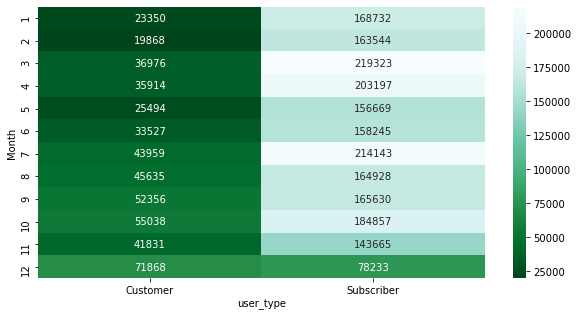

In [79]:
plt.figure(figsize = [10,5])
sns.heatmap(ct_counts, annot = True, fmt = '.0f', cmap = 'BuGn_r');
plt.xtitle('User Type')
plt.ylabel('Month')
plt.title('User Type Rides Frequency Per Month');

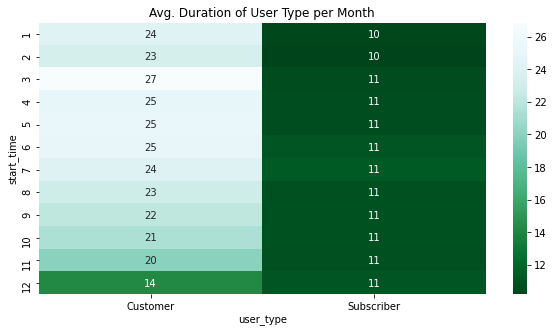

In [101]:
plt.figure(figsize=[10,5])
ct = df.groupby(['user_type', df.start_time.dt.month]).mean()['duration_min'].reset_index(name = "Avg.Duration")
ct = ct.pivot(index = 'start_time', columns = 'user_type', values = 'Avg.Duration')
plt.ylabel('Month');
plt.xlabel('User Type')
plt.title('Avg. Duration of User Type Per Month')
sns.heatmap(ct, annot = True, cmap='BuGn_r');

### Project Findings
#### Questions Explored
When are most trips taken in terms of time of day or day of the week?


How long does the average trip take?


Does the above depend on if a user is a subscriber or customer?

#### Conclusion

Trip average is around 550 seconds with most of the observations between 0 and 1750 

Through Univariate Exploration we found:
    
    That 80% of our observation are Subscribers and 20% Customers
    Most of trips durations are between 300 and 800 seconds with a peak of 400 seconds
    Hourly interval peaks from 7 to 10 am and 4 to 7 pm arise and gradually decline
    Daily interval with peak of day 31 of month and almost uniform distribution through the months days.
    Weekdays almost double the value of weekends so people with highest value of Tuesday with 427,640 occurrences 
    and 17% of relative frequency
    
    Rides Duration tend to be higher in the later hour of the day from both Subscribers and Customers
    
    Monthly interval peaks are depending on the weather, most of the summer has high values and begins to decline as
    the winter comes with highest of March and September 
    
    in terms of Area further investigation should be implemented regarding Longitude latitude do determine the country 
    but in my observations Market St at 10th ST Philadelphia followed by Sanfrancisco have the highest frequency, but I think if further investigation would be implemented SanFrancisco will have the highest frequency
    
    Although with a number of observations and total number of trip durations are for Subscribers due to their high 
    ratios of 80% but in term of means Cusomters have double the mean value of Subscribers which points to the high 
    variation in  Customers data
    
    Although Subscribers are more than customers in terms of rides frequency, but customers have higher ride duration 
    than Subscribers as demonstrated in heatmaps below